# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
humidity = []
city_name = []
clouds = []
latitude = []
winds = []
city_id = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        city = city.replace(' ', '%20')
        
        query_url = 'https://api.openweathermap.org/data/2.5/weather?q=' + city + '&appid=' + api_key + '&units=imperial'
        
        response = requests.get(f"{query_url}").json() 
        response

        temp.append(response['main']['temp'])
        temp
        
        humidity.append(response['main']['humidity'])
        humidity
        
        clouds.append(response['clouds']['all'])
        clouds

        winds.append(response['wind']['speed'])
        winds

        city_name.append(response['name'])
        city

        city_id.append(response['id'])
        city_id
        
        latitude.append(response['coord']['lat'])
        latitude
        
        print(f"city= {city} city ID={city_id} url= {query_url}")
        
        time.sleep(1.01)
        
        

city= jamestown city ID=[2069194] url= https://api.openweathermap.org/data/2.5/weather?q=jamestown&appid=ef38e2840a6faac5c5b49b00e82b020a&units=imperial
city= palmer city ID=[2069194, 2067070] url= https://api.openweathermap.org/data/2.5/weather?q=palmer&appid=ef38e2840a6faac5c5b49b00e82b020a&units=imperial
city= castro city ID=[2069194, 2067070, 3896218] url= https://api.openweathermap.org/data/2.5/weather?q=castro&appid=ef38e2840a6faac5c5b49b00e82b020a&units=imperial


KeyError: 'main'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data = {
    "City": city_name,
    "Cloudiness":clouds, 
    "Humidity": humidity,
    "Latitude":latitude, 
    "Wind Speed":winds,
    "Temperature":temp,
    "City_ID":city_id
    
}

weather_data_df = pd.DataFrame(weather_data)
weather_data_df


,City,Cloudiness,Humidity,Latitude,Wind Speed,Temperature,City_ID
0,Jamestown,2,12,-33.21,8.01,87.78,2069194
1,Palmer,98,6,-34.85,17.22,91.08,2067070
2,Castro,40,87,-42.48,3.36,42.80,3896218


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

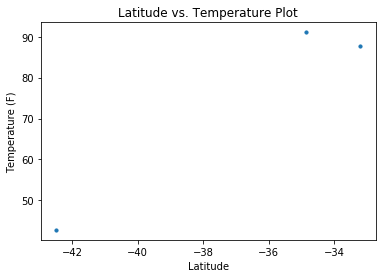

In [11]:
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.scatter( weather_data_df['Latitude'], weather_data_df['Temperature'], marker="o", s=10)
plt.show()

#### Latitude vs. Humidity Plot

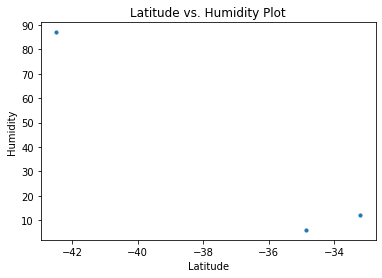

In [12]:
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.scatter( weather_data_df['Latitude'], weather_data_df['Humidity'], marker="o", s=10)
plt.show()

#### Latitude vs. Cloudiness Plot

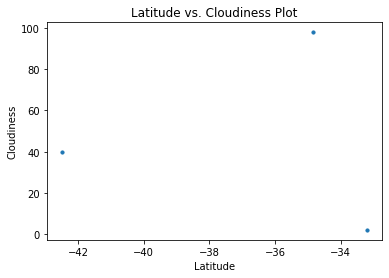

In [14]:
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.scatter( weather_data_df['Latitude'], weather_data_df['Cloudiness'], marker="o", s=10)
plt.show()

#### Latitude vs. Wind Speed Plot

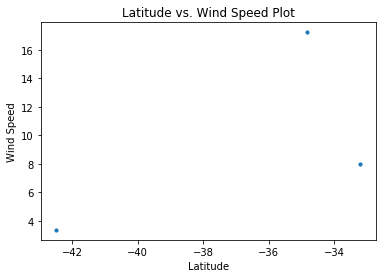

In [15]:
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.scatter( weather_data_df['Latitude'], weather_data_df['Wind Speed'], marker="o", s=10)
plt.show()